## Problem 4

## Problem 4

In [84]:
import numpy as np
import networkx as nx
from pathlib import Path
from matplotlib import pyplot as plt

gml_path = Path('airport-network.gml')
G = nx.read_gml(gml_path)

print(G.number_of_nodes())
print(G.number_of_edges())

1574
17215


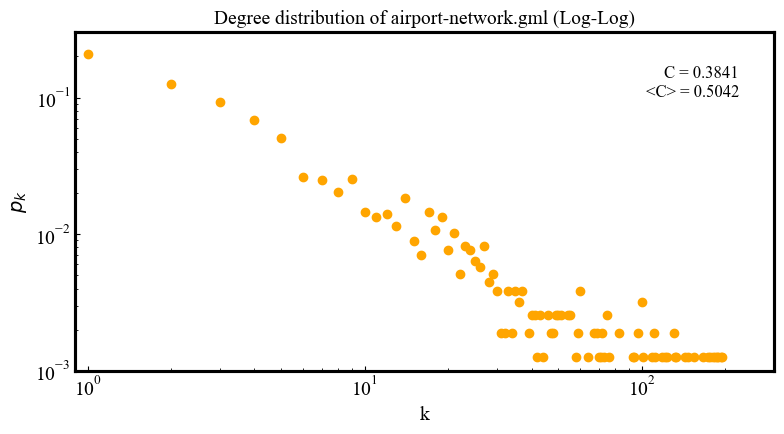

In [81]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

gml_path = Path('airport-network.gml')
G = nx.read_gml(gml_path)

global_clustering = nx.transitivity(G)
average_clustering = nx.average_clustering(G)

degree_sequence = [d for n, d in G.degree()]
degree_count = {}
for d in degree_sequence:
    degree_count[d] = degree_count.get(d, 0) + 1

total_nodes = len(degree_sequence)
degrees = sorted(degree_count.keys())
probabilities = [degree_count[d] / total_nodes for d in degrees]

fig = plt.figure("", figsize=(16/2, 9/2))
axgrid = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(axgrid[0, 0])
ax1.loglog(degrees, probabilities, "orange", marker="o", linestyle='None')
ax1.set_title("Degree distribution of airport-network.gml (Log-Log)")
ax1.set_ylabel(r"$p_{k}$")
ax1.set_xlabel("k")

for spine in ax1.spines.values():
    spine.set_linewidth(2.25)

ax1.tick_params(direction='in', which='both')

ax1.set_xlim(0.9, 300)
ax1.set_ylim(0.001, 0.3)

ax1.text(0.95, 0.9, f'C = {global_clustering:.4f}\n <C> = {average_clustering:.4f}', 
         transform=ax1.transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, linewidth=0))

fig.tight_layout()
plt.savefig('problem_4_a.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

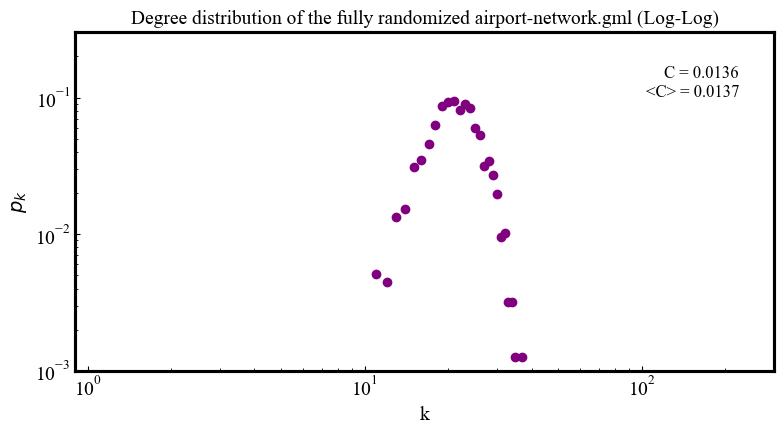

In [149]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

gml_path = Path('airport-network.gml')
G = nx.read_gml(gml_path)

Nnodes = G.number_of_nodes()
Nedges = G.number_of_edges()

G = nx.gnm_random_graph(Nnodes, Nedges)

global_clustering = nx.transitivity(G)
average_clustering = nx.average_clustering(G)

degree_sequence = [d for n, d in G.degree()]
degree_count = {}
for d in degree_sequence:
    degree_count[d] = degree_count.get(d, 0) + 1

total_nodes = len(degree_sequence)
degrees = sorted(degree_count.keys())
probabilities = [degree_count[d] / total_nodes for d in degrees]

fig = plt.figure("", figsize=(16/2, 9/2))
axgrid = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(axgrid[0, 0])
ax1.loglog(degrees, probabilities, "purple", marker="o", linestyle='None')
ax1.set_title("Degree distribution of the fully randomized airport-network.gml (Log-Log)")
ax1.set_ylabel(r"$p_{k}$")
ax1.set_xlabel("k")

for spine in ax1.spines.values():
    spine.set_linewidth(2.25)

ax1.tick_params(direction='in', which='both')

ax1.set_xlim(0.9, 300)
ax1.set_ylim(0.001, 0.3)

ax1.text(0.95, 0.9, f'C = {global_clustering:.4f}\n <C> = {average_clustering:.4f}', 
         transform=ax1.transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, linewidth=0))

fig.tight_layout()
plt.savefig('problem_4_b.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

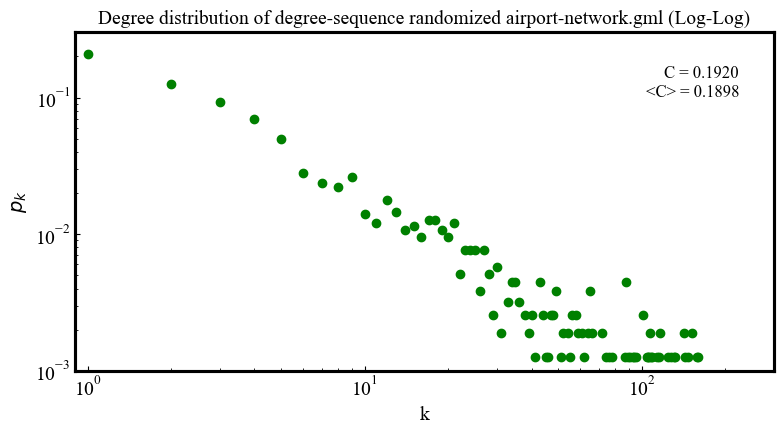

1574
14881


In [87]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

gml_path = Path('airport-network.gml')
G_original = nx.read_gml(gml_path)

original_degree_sequence = [d for n, d in G_original.degree()]

G = nx.configuration_model(original_degree_sequence)
G = nx.Graph(G)

global_clustering = nx.transitivity(G)
average_clustering = nx.average_clustering(G)

degree_sequence = [d for n, d in G.degree()]
degree_count = {}
for d in degree_sequence:
    degree_count[d] = degree_count.get(d, 0) + 1

total_nodes = len(degree_sequence)
degrees = sorted(degree_count.keys())
probabilities = [degree_count[d] / total_nodes for d in degrees]

fig = plt.figure("", figsize=(16/2, 9/2))
axgrid = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(axgrid[0, 0])
ax1.loglog(degrees, probabilities, "green", marker="o", linestyle='None')
ax1.set_title("Degree distribution of degree-sequence randomized airport-network.gml (Log-Log)")
ax1.set_ylabel(r"$p_{k}$")
ax1.set_xlabel("k")

for spine in ax1.spines.values():
    spine.set_linewidth(2.25)

ax1.tick_params(direction='in', which='both')

ax1.set_xlim(0.9, 300)
ax1.set_ylim(0.001, 0.3)

ax1.text(0.95, 0.9, f'C = {global_clustering:.4f}\n <C> = {average_clustering:.4f}', 
         transform=ax1.transAxes, fontsize=12, 
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, linewidth=0))

fig.tight_layout()
plt.savefig('problem_4_c.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

print(G.number_of_nodes())
print(G.number_of_edges())

## Problem 5

In [156]:
Nnodes = 1000
step = np.power(10,1/5)
p_initial = 0.0001
p_iterator_max = 20

probabilities = [p_initial * np.power(step, p_iterator) for p_iterator in np.arange(0, p_iterator_max+1)]
Average_clustering_list = [0] * len(probabilities)
Average_path_length_list = [0] * len(probabilities)

initial_average_clustering = nx.average_clustering(nx.watts_strogatz_graph(Nnodes, 10, 0))
initial_average_path_length = nx.average_shortest_path_length(nx.watts_strogatz_graph(Nnodes, 10, 0))

N_config = 20

for p_iterator, p in enumerate(probabilities):
    clustering_temp = 0
    path_length_temp = 0
    for _ in range(N_config):
        G = nx.watts_strogatz_graph(Nnodes, 10, p)
        clustering_temp += nx.average_clustering(G)
        try:
            path_length_temp += nx.average_shortest_path_length(G)
        except nx.NetworkXError:
            path_length_temp += 0
    Average_clustering_list[p_iterator] = (clustering_temp / N_config) / initial_average_clustering
    Average_path_length_list[p_iterator] = (path_length_temp / N_config) / initial_average_path_length

/var/folders/1n/rqr82kgs60s4205zxs_lb3t00000gn/T/ipykernel_54354/4137290772.py:24: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0, 1.1)


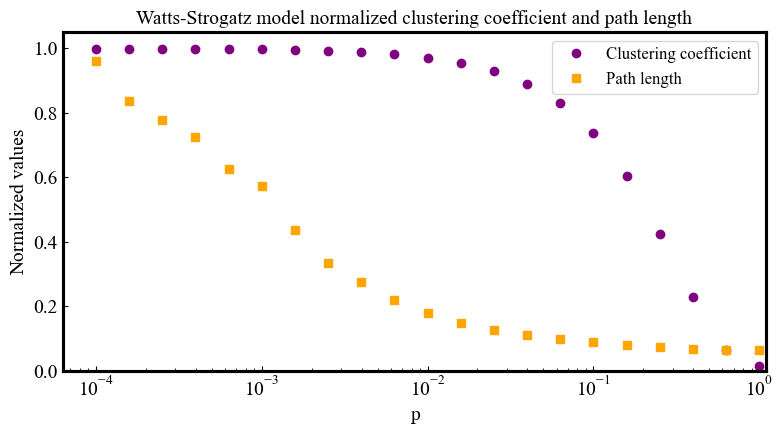

In [157]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

fig = plt.figure("", figsize=(16/2, 9/2))
axgrid = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(axgrid[0, 0])
ax1.semilogx(probabilities, Average_clustering_list, "purple", marker="o", linestyle='None', label='Clustering coefficient')
ax1.semilogx(probabilities, Average_path_length_list, "orange", marker="s", linestyle='None', label='Path length')
ax1.set_title("Watts-Strogatz model normalized clustering coefficient and path length")
ax1.set_ylabel("Normalized values")
ax1.set_xlabel("p")
ax1.legend()

for spine in ax1.spines.values():
    spine.set_linewidth(2.25)

ax1.tick_params(direction='in', which='both')

ax1.set_xlim(0, 1.1)
ax1.set_ylim(0, 1.05)

fig.tight_layout()
plt.savefig('problem_5.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()